
Contents of dodgers data frame ---------------
  month  day  attend day_of_week opponent  temp   skies day_night cap shirt  \
0   APR   10   56000     Tuesday  Pirates    67   Clear       Day  NO    NO   
1   APR   11   29729   Wednesday  Pirates    58  Cloudy     Night  NO    NO   
2   APR   12   28328    Thursday  Pirates    57  Cloudy     Night  NO    NO   
3   APR   13   31601      Friday   Padres    54  Cloudy     Night  NO    NO   
4   APR   14   46549    Saturday   Padres    57  Cloudy     Night  NO    NO   

  fireworks bobblehead  attend_000  
0        NO         NO      56.000  
1        NO         NO      29.729  
2        NO         NO      28.328  
3       YES         NO      31.601  
4        NO         NO      46.549  


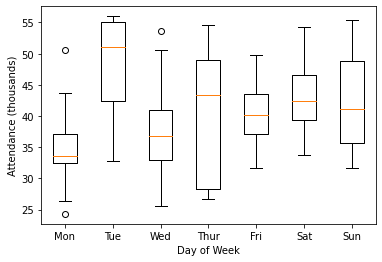

In [3]:
# Traditional Conjoint Analysis (Python)

# prepare for Python version 3x features and functions
from __future__ import division, print_function

# import packages for analysis and modeling
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
from numpy import unique
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
from patsy.contrasts import Sum
from scipy.stats import uniform  # for training-and-test split
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns

# read in Dodgers bobbleheads data and create data frame
dodgers = pd.read_csv("dodgers.csv")

# examine the structure of the data frame
print("\nContents of dodgers data frame ---------------")

# attendance in thousands for plotting 
dodgers['attend_000'] = dodgers['attend']/1000

# print the first five rows of the data frame
print(pd.DataFrame.head(dodgers)) 

mondays = dodgers[dodgers['day_of_week'] == 'Monday']
tuesdays = dodgers[dodgers['day_of_week'] == 'Tuesday']
wednesdays = dodgers[dodgers['day_of_week'] == 'Wednesday']
thursdays = dodgers[dodgers['day_of_week'] == 'Thursday']
fridays = dodgers[dodgers['day_of_week'] == 'Friday']
saturdays = dodgers[dodgers['day_of_week'] == 'Saturday']
sundays = dodgers[dodgers['day_of_week'] == 'Sunday']

# convert days' attendance into list of vectors for box plot
data = [mondays['attend_000'], tuesdays['attend_000'], 
    wednesdays['attend_000'], thursdays['attend_000'], 
    fridays['attend_000'], saturdays['attend_000'], 
    sundays['attend_000']]
ordered_day_names = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

# exploratory data analysis: box plot for day of the week
fig, axis = plt.subplots()
axis.set_xlabel('Day of Week')
axis.set_ylabel('Attendance (thousands)')
day_plot = plt.boxplot(data, sym='o', vert=1, whis=1.5)
plt.setp(day_plot['boxes'], color = 'black')    
plt.setp(day_plot['whiskers'], color = 'black')    
plt.setp(day_plot['fliers'], color = 'black', marker = 'o')
axis.set_xticklabels(ordered_day_names)
plt.show()
# plt.savefig('fig_advert_promo_dodgers_eda_day_of_week_Python.pdf', 
#     bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
#     orientation='portrait', papertype=None, format=None, 
#     transparent=True, pad_inches=0.25, frameon=None)  




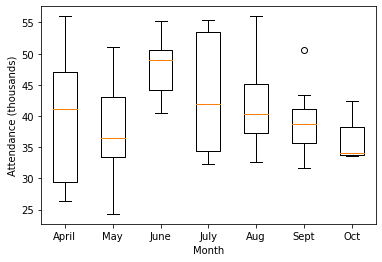

In [4]:
april = dodgers[dodgers['month'] == 'APR']
may = dodgers[dodgers['month'] == 'MAY']
june = dodgers[dodgers['month'] == 'JUN']
july = dodgers[dodgers['month'] == 'JUL']
august = dodgers[dodgers['month'] == 'AUG']
september = dodgers[dodgers['month'] == 'SEP']
october = dodgers[dodgers['month'] == 'OCT']

data = [april['attend_000'], may['attend_000'], 
    june['attend_000'], july['attend_000'], 
    august['attend_000'], september['attend_000'], 
    october['attend_000']]
ordered_month_names = ['April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct']

fig, axis = plt.subplots()
axis.set_xlabel('Month')
axis.set_ylabel('Attendance (thousands)')
day_plot = plt.boxplot(data, sym='o', vert=1, whis=1.5)
plt.setp(day_plot['boxes'], color = 'black')    
plt.setp(day_plot['whiskers'], color = 'black')    
plt.setp(day_plot['fliers'], color = 'black', marker = 'o')
axis.set_xticklabels(ordered_month_names)
plt.show()



In [ ]:
# read in conjoint survey profiles with respondent ranks
conjoint_data_frame = pd.read_csv('dodgers.csv')

# set up sum contrasts for effects coding as needed for conjoint analysis
# using C(effect, Sum) notation within main effects model specification
main_effects_model = 'ranking ~ C(brand, Sum) + C(startup, Sum) +  \
    C(monthly, Sum) + C(service, Sum) + C(retail, Sum) + C(apple, Sum) + \
    C(samsung, Sum) + C(google, Sum)'

# fit linear regression model using main effects only (no interaction terms)
main_effects_model_fit = \
    smf.ols(main_effects_model, data = conjoint_data_frame).fit()
print(main_effects_model_fit.summary()) 

conjoint_attributes = ['brand', 'startup', 'monthly', 'service', \
    'retail', 'apple', 'samsung', 'google']

# build part-worth information one attribute at a time
level_name = []
part_worth = []
part_worth_range = []
end = 1  # initialize index for coefficient in params
for item in conjoint_attributes:
    nlevels = len(list(unique(conjoint_data_frame[item])))
    level_name.append(list(unique(conjoint_data_frame[item]))) 
    begin = end 
    end = begin + nlevels - 1
    new_part_worth = list(main_effects_model_fit.params[begin:end])
    new_part_worth.append((-1) * sum(new_part_worth))  
    part_worth_range.append(max(new_part_worth) - min(new_part_worth))  
    part_worth.append(new_part_worth)   
    # end set to begin next iteration
    
# compute attribute relative importance values from ranges
attribute_importance = []
for item in part_worth_range:
    attribute_importance.append(round(100 * (item / sum(part_worth_range)),2))
    
# user-defined dictionary for printing descriptive attribute names     
effect_name_dict = {'brand' : 'Mobile Service Provider', \
    'startup' : 'Start-up Cost', 'monthly' : 'Monthly Cost', \
    'service' : 'Offers 4G Service', 'retail' : 'Has Nearby Retail Store', \
    'apple' : 'Sells Apple Products', 'samsung' : 'Sells Samsung Products', \
    'google' : 'Sells Google/Nexus Products'}  
 
# report conjoint measures to console 
index = 0  # initialize for use in for-loop
for item in conjoint_attributes:
    print('\nAttribute:', effect_name_dict[item])
    print('    Importance:', attribute_importance[index])
    print('    Level Part-Worths')
    for level in range(len(level_name[index])):
        print('       ',level_name[index][level], part_worth[index][level])       
    index = index + 1

# Suggestions for the student:
# Enter your own rankings for the product profiles and generate
# conjoint measures of attribute importance and level part-worths.
# Note that the model fit to the data is a linear main-effects model.
# See if you can build a model with interaction effects for service
# provider attributes.